<a href="https://colab.research.google.com/github/mlsanyang1/A-PYTHON-PROGRAM-TO-COMPARE-SALARIES-OF-PROGRAMMERS/blob/main/Deep_Learning_project_1_ipynbPyto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEEP LEARNING IMAGE PROCESSING**

LOADING PYTHON DEPENDENCIES




In [ ]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow




In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)


In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
!wget 'http://images.cocodataset.org/val2017/000000039769.jpg'


--2024-12-19 08:42:36--  http://images.cocodataset.org/val2017/000000039769.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.41.225, 52.217.86.220, 52.217.228.121, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.41.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173131 (169K) [image/jpeg]
Saving to: ‘000000039769.jpg.2’

000000039769.jpg.2  100%[===================>] 169.07K   863KB/s    in 0.2s    

2024-12-19 08:42:37 (863 KB/s) - ‘000000039769.jpg.2’ saved [173131/173131]



In [ ]:
ig = Image.open("/content/000000039769.jpg")

In [ ]:
transform = T.ToTensor()
img = transform(ig)

In [ ]:
with torch.no_grad():
  prediction = model([img])


In [ ]:
prediction

[{'boxes': tensor([[223.9510, 181.7635, 373.8177, 335.2308],
          [367.2579, 281.2931, 403.5620, 389.4769],
          [119.8036, 183.7681, 212.0310, 311.7230],
          [313.5526, 191.1223, 406.8873, 318.8974],
          [ 11.2399, 184.7156, 135.1501, 318.2921],
          [ 11.4252, 182.2755, 134.2797, 318.2733],
          [280.5661,  57.8185, 291.3638,  73.0454],
          [237.8402, 243.5818, 258.8752, 265.7149],
          [380.0482, 224.9837, 391.7169, 240.6304],
          [121.8406, 180.4362, 210.6826, 319.6509],
          [375.3402, 303.5858, 390.6055, 337.9880],
          [237.4362, 247.0828, 264.8068, 278.8687],
          [278.4922,  75.6904, 292.6612, 120.9725],
          [375.0342, 221.6592, 389.0082, 239.8730],
          [278.8959,  78.4516, 292.3811, 102.1571],
          [378.7462, 301.3061, 399.9148, 359.3881],
          [  3.2332, 193.0316,  21.4527, 305.5177],
          [377.8712, 218.8917, 395.9646, 241.2425],
          [349.3245, 221.6100, 367.2914, 240.3770],
   

In [ ]:
prediction[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
bboxes , labels , scores = prediction[0]['boxes'] , prediction[0]['labels'] , prediction[0]['scores']

In [ ]:
scores

tensor([0.9890, 0.9787, 0.9535, 0.7806, 0.5408, 0.5395, 0.5385, 0.1688, 0.1612,
        0.1490, 0.1336, 0.1324, 0.1251, 0.1181, 0.0999, 0.0805, 0.0639, 0.0601,
        0.0566, 0.0522])

In [ ]:
torch.argwhere(scores > 0.9)

tensor([[0],
        [1],
        [2]])

In [ ]:
num = torch.argwhere(scores > 0.9).shape[0]

In [ ]:
labels

tensor([17, 75, 17, 75, 63, 63, 65, 49, 17, 63, 65, 63, 17, 63, 65, 17, 65, 17,
         1, 63])

In [ ]:
labels.shape

torch.Size([20])

In [ ]:
num

3

In [ ]:
len(prediction[0])

3

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , "frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , "baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , "plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , "banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" , "pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" , "mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" , "laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" , "oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" , "clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush" ]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
igg = cv2.imread("/content/000000039769.jpg")
for i in range(num):
  x1 , y1 , x2 , y2 = bboxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i] - 1]
  igg = cv2.rectangle(igg , (x1 , y1 , ) , (x2 , y2) , (0 , 255 , 0) , 1)
  igg = cv2.putText(igg , class_name , (x1 , y1 - 10) , font , 0.5 , (255 , 0 , 0) , 1 , cv2.LINE_AA)



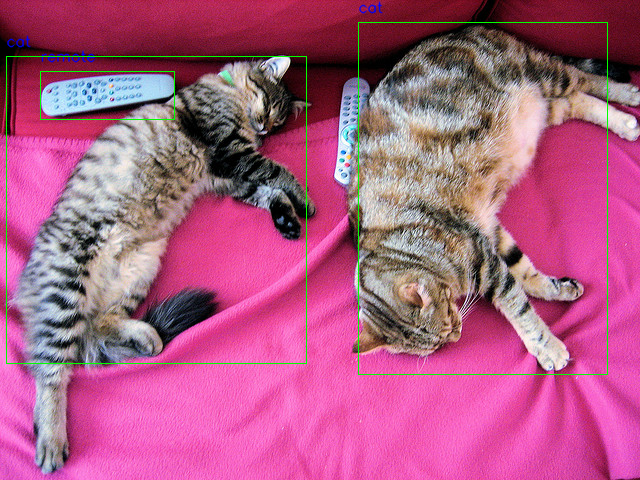

In [ ]:
cv2_imshow(igg)

In [ ]:
bboxes

tensor([[3.5851e+02, 2.2461e+01, 6.0734e+02, 3.7493e+02],
        [4.0915e+01, 7.1900e+01, 1.7457e+02, 1.1951e+02],
        [6.0891e+00, 5.6809e+01, 3.0631e+02, 3.6388e+02],
        [3.3352e+02, 7.7494e+01, 3.6730e+02, 1.7847e+02],
        [0.0000e+00, 0.0000e+00, 6.4000e+02, 4.4384e+02],
        [1.5226e+01, 1.0064e-01, 6.2208e+02, 1.4637e+02],
        [5.5273e+01, 3.0659e+01, 6.3869e+02, 4.6655e+02],
        [3.3274e+02, 7.3346e+01, 3.6982e+02, 1.8728e+02],
        [9.4835e+00, 1.1760e+02, 2.2444e+02, 4.6855e+02],
        [0.0000e+00, 4.1583e+00, 4.0290e+02, 3.4886e+02],
        [4.7632e+02, 8.2954e+01, 6.4000e+02, 4.4520e+02],
        [3.4577e+02, 6.9386e+00, 6.3626e+02, 3.8741e+02],
        [4.2218e+01, 9.6677e+01, 5.1741e+02, 4.6243e+02],
        [4.8593e+02, 8.3309e+01, 6.4000e+02, 4.4439e+02],
        [0.0000e+00, 1.3932e+01, 4.1646e+02, 3.6014e+02],
        [3.3513e+02, 1.6283e+02, 5.7815e+02, 3.7091e+02],
        [8.5298e+00, 3.0966e+00, 6.2987e+02, 1.5758e+02],
        [4.201